# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

### Data Collection

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 35
page_size = 100

articles = []
rating_value = [] 
# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    articles.append((parsed_content.find_all("article", {"itemprop":"review"})))
    print(f"   ---> {len(articles)} total reviews")

Scraping page 1
   ---> 1 total reviews
Scraping page 2
   ---> 2 total reviews
Scraping page 3
   ---> 3 total reviews
Scraping page 4
   ---> 4 total reviews
Scraping page 5
   ---> 5 total reviews
Scraping page 6
   ---> 6 total reviews
Scraping page 7
   ---> 7 total reviews
Scraping page 8
   ---> 8 total reviews
Scraping page 9
   ---> 9 total reviews
Scraping page 10
   ---> 10 total reviews
Scraping page 11
   ---> 11 total reviews
Scraping page 12
   ---> 12 total reviews
Scraping page 13
   ---> 13 total reviews
Scraping page 14
   ---> 14 total reviews
Scraping page 15
   ---> 15 total reviews
Scraping page 16
   ---> 16 total reviews
Scraping page 17
   ---> 17 total reviews
Scraping page 18
   ---> 18 total reviews
Scraping page 19
   ---> 19 total reviews
Scraping page 20
   ---> 20 total reviews
Scraping page 21
   ---> 21 total reviews
Scraping page 22
   ---> 22 total reviews
Scraping page 23
   ---> 23 total reviews
Scraping page 24
   ---> 24 total reviews
Scraping p

Here the articles list are in 2-D. hence to make it 1-D the itertools is used 

In [ ]:
from itertools import chain
flatten_list = list(chain.from_iterable(articles))

In [ ]:
len(flatten_list)

3441

To collect all the specific details from webscrapping, The class reviews is developed.
This ensures that all the empty values are considered as null values for a particular review.

Here 11 features are scrapped from the websites, namely:-

1. overall_rating = as the name suggest it consists of overall rating of the passengers expeience.
2. content = the subjective review of the passenger about the Airlines.
3. aircraft = the aircraft that the passenger travelled in.
4. type_of_traveller = the categories are present that are provided by the airlines.
5. seat_type = according to the type of travel the customer chose the seat type changes.
6. route = consists info about the travellers source and destination.
7. following are the ratings that they provided on the scale of 0-5
    *   seat_comfort
    *   food_and _beverage
    * ground_service
    * cabin_staff service
8. recommended = consists the info whether the passenger recommended or not


In [ ]:
class reviews():
  def __init__(self,  overal_rating, content, seat_comfort,cabin_staff_service, food_and_beverages, ground_service, aircraft, type_of_traveller	, seat_type, route, recommended ):
    self.overal_rating = overal_rating
    self.content = content
    self.seat_comfort = seat_comfort
    self.cabin_staff_service = cabin_staff_service
    self.food_and_beverages = food_and_beverages 
    self.ground_service = ground_service
    self.aircraft = aircraft
    self.type_of_traveller = type_of_traveller
    self.seat_type = seat_type
    self.route = route
    self.recommended = recommended


In [ ]:
def get_reviews(articles):
  reviews_list = []

  for art in articles:

    content = art.find("div", {"class" : "text_content "})
    content = content.get_text() if content is not None else "NA"

    overal_rating = art.find("span",{ "itemprop" : "ratingValue"} )
    overal_rating = overal_rating.get_text() if overal_rating is not None else "NA"
    
    table = art.find_all("table", {"class", "review-ratings"}) 
    for items in table:
      aircraft = items.find( "td", class_ ="review-rating-header aircraft ")
      if aircraft is not None: 
        aircraft = aircraft.find_next("td", class_="review-value ").get_text()

      type_of_traveller = items.find("td", class_="review-rating-header type_of_traveller ")    
      if type_of_traveller is not None:
        type_of_traveller = type_of_traveller.find_next("td", class_="review-value ").get_text()

      seat_type = items.find("td",class_="review-rating-header cabin_flown ")    
      if seat_type is not None:
        seat_type = seat_type.find_next("td", class_="review-value ").get_text()

      route = items.find("td",class_="review-rating-header route ")    
      if route is not None:
        route = route.find_next("td", class_="review-value ").get_text()
      
      recommend = items.find("td",class_="review-rating-header recommended")    
      if recommend is not None:
        recommended_val = recommend.find_next("td", class_="review-value rating-yes")
        recommended = recommended_val.get_text() if recommended_val is not None else "no" 

      for row in items.find_all('td' , {"class": ["seat_comfort", "cabin_staff_service", "food_and_beverages", "ground_service"]}):
          if row is not None:
            feature = row.get("class")[1]
            span = row.find_next("td", {"class", "review-rating-stars stars"})
            feature_rating = len(span.find_all('span', {"class","star fill" })) 
            if feature == "seat_comfort":
              seat_comfort = (feature_rating)
            elif feature == "cabin_staff_service":
              cabin_staff_service = (feature_rating)
            elif feature == "food_and_beverages":
              food_and_beverages= (feature_rating)
            elif feature == "ground_service":
              ground_service = (feature_rating)
          else:
            seat_comfort= (0)
            cabin_staff_service= (0)
            food_and_beverages = (0)
            ground_service = (0)

      reviews_list.append(reviews(overal_rating, content, seat_comfort, cabin_staff_service, food_and_beverages, ground_service,
                                  aircraft, type_of_traveller, seat_type, route, recommended))
  return reviews_list
    

In [ ]:
final_list = get_reviews(flatten_list)

In [ ]:
len(final_list)

3441

total Reviews are 3441 

In [ ]:
vars(final_list[0]) , vars(final_list[1]), vars(final_list[2])

({'overal_rating': '3',
  'content': '✅ Trip Verified |  Another BA Shambles. Started off well with excellent check in at first at t5, mid afternoon so avoided the early morning, evening scrum. Into the Concorde lounge, excellent service again. Great choice of cocktails, wine etc. Food ok a bit overcooked but pretty reasonable. Called to the boarding gate. Chaos, people jostling for position to get on the plane. People with children under 5 called before the 8 people in first bankrolling the flight and most of them well over 5. We get on to be told that none of the lights in first can be dimmed at all, so the lights were on all night. It was like being detained and interrogated! Excellent wine and champagne selection. Dinner menu handed out. I’ll have the prawn cocktail to start please. No you won’t as they’ve only loaded one for 8 people and the guy in 1A got it. I bet he felt like he’d won the lottery. Ok I’ll have the beef wellington, basically a freezing slice of beef with some let

In [ ]:
import pandas as pd

converting the list of reviews into the dataframe for better accessability

In [ ]:
data = pd.DataFrame.from_records([vars(s) for s in final_list])

In [ ]:
data.head()

,overal_rating,content,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,aircraft,type_of_traveller,seat_type,route,recommended
0,3,✅ Trip Verified | Another BA Shambles. Starte...,2,2,1,3,Boeing 777-300,Couple Leisure,First Class,London to Male,yes
1,1,Not Verified | BA cancelled my flight home to...,2,3,1,1,A320,Solo Leisure,Economy Class,Keflavik to London Heathrow,yes
2,1,"Not Verified | BA cancelled my flight home, t...",3,4,3,1,None,Business,Business Class,London Heathrow to Frankfurt,yes
3,2,✅ Trip Verified | Turned up 3.5 hours in advan...,2,2,2,1,None,Solo Leisure,Economy Class,London Heathrow to Bangkok via Doha,yes
4,2,Not Verified | Boarding – at gate at LGW they...,4,1,1,1,None,Couple Leisure,Premium Economy,London Gatwick to Cancun,yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441 entries, 0 to 3440
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   overal_rating        3441 non-null   object
 1   content              3441 non-null   object
 2   seat_comfort         3441 non-null   int64 
 3   cabin_staff_service  3441 non-null   int64 
 4   food_and_beverages   3441 non-null   int64 
 5   ground_service       3441 non-null   int64 
 6   aircraft             1798 non-null   object
 7   type_of_traveller    2671 non-null   object
 8   seat_type            3439 non-null   object
 9   route                2667 non-null   object
 10  recommended          3441 non-null   object
dtypes: int64(4), object(7)
memory usage: 295.8+ KB


In [ ]:
from google.colab import files
data.to_csv("/BA_reviews.csv")
files.download('/BA_reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Data Cleaning

In [5]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
df = pd.read_csv('/content/drive/MyDrive/B_A_Data/BA_reviews.csv')

In [ ]:
df.head()

,Unnamed: 0,overal_rating,content,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,aircraft,type_of_traveller,seat_type,route,recommended
0,0,3.0,✅ Trip Verified | Another BA Shambles. Starte...,2,2,1,3,Boeing 777-300,Couple Leisure,First Class,London to Male,yes
1,1,1.0,Not Verified | BA cancelled my flight home to...,2,3,1,1,A320,Solo Leisure,Economy Class,Keflavik to London Heathrow,yes
2,2,1.0,"Not Verified | BA cancelled my flight home, t...",3,4,3,1,NaN,Business,Business Class,London Heathrow to Frankfurt,yes
3,3,2.0,✅ Trip Verified | Turned up 3.5 hours in advan...,2,2,2,1,NaN,Solo Leisure,Economy Class,London Heathrow to Bangkok via Doha,yes
4,4,2.0,Not Verified | Boarding – at gate at LGW they...,4,1,1,1,NaN,Couple Leisure,Premium Economy,London Gatwick to Cancun,yes


In [ ]:
df.drop("Unnamed: 0", inplace =True, axis =1 )

In [ ]:
df.head()

,overal_rating,content,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,aircraft,type_of_traveller,seat_type,route,recommended
0,3.0,✅ Trip Verified | Another BA Shambles. Starte...,2,2,1,3,Boeing 777-300,Couple Leisure,First Class,London to Male,yes
1,1.0,Not Verified | BA cancelled my flight home to...,2,3,1,1,A320,Solo Leisure,Economy Class,Keflavik to London Heathrow,yes
2,1.0,"Not Verified | BA cancelled my flight home, t...",3,4,3,1,NaN,Business,Business Class,London Heathrow to Frankfurt,yes
3,2.0,✅ Trip Verified | Turned up 3.5 hours in advan...,2,2,2,1,NaN,Solo Leisure,Economy Class,London Heathrow to Bangkok via Doha,yes
4,2.0,Not Verified | Boarding – at gate at LGW they...,4,1,1,1,NaN,Couple Leisure,Premium Economy,London Gatwick to Cancun,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441 entries, 0 to 3440
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   overal_rating        3436 non-null   float64
 1   content              3441 non-null   object 
 2   seat_comfort         3441 non-null   int64  
 3   cabin_staff_service  3441 non-null   int64  
 4   food_and_beverages   3441 non-null   int64  
 5   ground_service       3441 non-null   int64  
 6   aircraft             1798 non-null   object 
 7   type_of_traveller    2671 non-null   object 
 8   seat_type            3439 non-null   object 
 9   route                2667 non-null   object 
 10  recommended          3441 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 295.8+ KB


here there are varied number of null values in all the features. 

In [ ]:
df[df['overal_rating'].isnull() == True]

,overal_rating,content,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,aircraft,type_of_traveller,seat_type,route,recommended
2871,NaN,Cabin crew polite unfortunately BA ran out of ...,3,5,1,3,NaN,NaN,Economy Class,NaN,yes
2990,NaN,Phoenix to London - outbound a wonderful and e...,1,5,4,3,NaN,NaN,First Class,NaN,yes
3011,NaN,On past experience I chose BA for our long hau...,3,3,2,3,NaN,NaN,Economy Class,NaN,yes
3250,NaN,LHR-CPH-LHR Business Class. This is a joke. Sc...,1,1,1,3,NaN,NaN,Business Class,NaN,yes
3277,NaN,I flew with British Airways with my mother fro...,1,3,1,3,NaN,NaN,Economy Class,NaN,yes


as we can see that there are null values in overall_rating feature and all other subjective_feature as well. hence we should discard these rows.
 

In [ ]:
df[df['content'].isnull() == True]

,overal_rating,content,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,aircraft,type_of_traveller,seat_type,route,recommended


In [ ]:
df.drop(df[df.overal_rating.isnull() == True].index, axis=0, inplace=True)

In [ ]:
df.shape

(3436, 11)

In [2]:
df.overal_rating.describe()

NameError: ignored

Hence they are discarded

####Verification.

Now based on  the content messages of all the reviews. There are 3 main categories namely 
1. Unverified - The passenger did provide the details but they were maybe false.
2. Not verified.- the passenger is maybe anonymous or didnt provide their air tickets details. 
3. Verified- The passengers travel was authentic.

Here we should group them into 2 main Categories. i.e. verified or not. 
since not verified and unverfied are more or less similar reviews. Also we cant discard them as there may be legitimate reviews but didnt simply provide their identity and chose to remain anonymous. 

In [ ]:
df['Verification'] = 0

0--> unverified,  no verification

1 --> verified

In [ ]:
df.head()

,overal_rating,content,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,aircraft,type_of_traveller,seat_type,route,recommended,Verification
0,3.0,✅ Trip Verified | Another BA Shambles. Starte...,2,2,1,3,Boeing 777-300,Couple Leisure,First Class,London to Male,yes,0
1,1.0,Not Verified | BA cancelled my flight home to...,2,3,1,1,A320,Solo Leisure,Economy Class,Keflavik to London Heathrow,yes,0
2,1.0,"Not Verified | BA cancelled my flight home, t...",3,4,3,1,NaN,Business,Business Class,London Heathrow to Frankfurt,yes,0
3,2.0,✅ Trip Verified | Turned up 3.5 hours in advan...,2,2,2,1,NaN,Solo Leisure,Economy Class,London Heathrow to Bangkok via Doha,yes,0
4,2.0,Not Verified | Boarding – at gate at LGW they...,4,1,1,1,NaN,Couple Leisure,Premium Economy,London Gatwick to Cancun,yes,0


In [ ]:
def remove_special_character():
  df['content'] = df['content'].apply(lambda x: x.replace("❎", "")  )
  df['content'] = df['content'].apply(lambda x: x.replace("✅", "")  )

  for i in (range(len(df))) :
    if (df.iloc[i,1].startswith(' Trip Verified | ')):
      df.iloc[i,1] = df.iloc[i,1].replace(' Trip Verified | ', '')
      df.iloc[i,-1] = 1
    elif (df.iloc[i,1].startswith('Not Verified |')):
      df.iloc[i,1] = df.iloc[i,1].replace('Not Verified |', '')
      df.iloc[i,-1] = 0
    elif (df.iloc[i,1].startswith('Unverified | ')):
      df.iloc[i,1] = df.iloc[i,1].replace('Unverified | ', '')
      df.iloc[i,-1] = 0

In [ ]:
remove_special_character()

In [ ]:
df.head()

,overal_rating,content,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,aircraft,type_of_traveller,seat_type,route,recommended,Verification
0,3.0,Another BA Shambles. Started off well with ex...,2,2,1,3,Boeing 777-300,Couple Leisure,First Class,London to Male,yes,1
1,1.0,BA cancelled my flight home to Heathrow on D...,2,3,1,1,A320,Solo Leisure,Economy Class,Keflavik to London Heathrow,yes,0
2,1.0,"BA cancelled my flight home, the last flight...",3,4,3,1,NaN,Business,Business Class,London Heathrow to Frankfurt,yes,0
3,2.0,"Turned up 3.5 hours in advance, Terminal 5 at ...",2,2,2,1,NaN,Solo Leisure,Economy Class,London Heathrow to Bangkok via Doha,yes,1
4,2.0,Boarding – at gate at LGW they called Group ...,4,1,1,1,NaN,Couple Leisure,Premium Economy,London Gatwick to Cancun,yes,0


In [ ]:
df.Verification.value_counts()

0    2479
1     957
Name: Verification, dtype: int64

In [ ]:
verified  = df.Verification.value_counts()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


([<matplotlib.patches.Wedge at 0x7faed617c100>,
 [Text(-0.9210531387624968, -0.7691951089130462, 'Unverified'),
  Text(0.8442987105322889, 0.7050955165036256, 'verified')],
 [Text(-0.5372809976114564, -0.4486971468659436, '72.1%'),
  Text(0.4605265693812484, 0.384597554456523, '27.9%')])

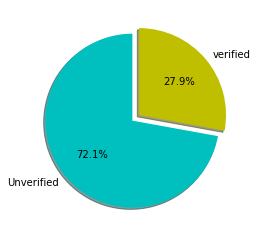

In [ ]:
plt.pie(verified,labels = ["Unverified", "verified"],autopct = '%1.1f%%', shadow = True,startangle= 90, colors= "cy", explode = [0.1,0])

After adding a column for verification according to the status there are 2479 unverified/ not verified passengers while 957 reviews are verified.
1. unverified    72.14% 
2. verified    27.85% 
of the data set 

#### Categorical Features and Null Values

It is Observed that The categorical Features aircraft, Seat type , Type of Traveller, consists of number of null values. Out of all the Aircraft details are pretty vague hence We can discrard the complete column. Also, discarding the tuples that have null values for types_of_traveller.  

There are three ways to handle the missing values in a categorical feature. 
1. Replace the value with the highest mode of that feature.
*   widely used mechanism and recommended 
*   Features having a max number of null values may bias prediction if replace with the most occurred category.
* It distorts the relation of the most frequent label.

2. Create a new feature for all nan values (e.g. Unknown)
* Advantage: Simple and easy to implement for categorical variables/columns and preserves the variance.

* Disadvantage: May create random data if the missing category is more.
* Doesn’t give good results when missing data is a high percentage of the data.
3. do 1st and also create a weight kind of a column where if the value was nan earlier then in a new column hash it to 1 else 0. 
* Advantage: Capture the importance of missingness.
* Dis - Creating Additional Features(Curse of Dimensionality) e.g. if there are 10 columns have null values need to create 10 extra columns.
* Potentially misunderstood data & the number of missing data should be large enough.


#####Playround for exploring the null values.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
rating = df[['food_and_beverages', 'cabin_staff_service', 'ground_service', 'seat_comfort']]

In [ ]:
mean_value_ratings = {i:df[f'{i}'].mean()for i in  rating.columns }

In [ ]:
mean_value_ratings

{'food_and_beverages': 2.7322467986030268,
 'cabin_staff_service': 3.278521536670547,
 'ground_service': 2.8760186263096625,
 'seat_comfort': 2.9027939464493597}

In [ ]:
mean_value_ratings = pd.Series(mean_value_ratings)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

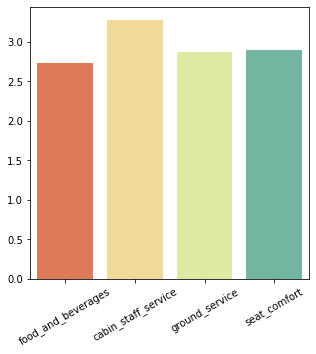

In [ ]:
fig, ax = plt.subplots()
sns.barplot(x = mean_value_ratings.index, y = mean_value_ratings.values, palette = 'Spectral')
fig.set_figheight(5)
fig.set_figwidth(5)
plt.xticks(rotation=30)


######seat_type
For Seat Type, as there are only two mising values we replaced them with the category which has highest mode. 

In [ ]:
df[df['seat_type'].isnull() == True].shape

(2, 12)

In [ ]:
most_frequent_category=df['seat_type'].mode()[0]
most_frequent_category

'Economy Class'

In [ ]:
df.seat_type.fillna(most_frequent_category, inplace = True)

In [ ]:
df[df['seat_type'].isnull() == True].shape

(0, 12)

###### Type of traveller

For Type_of_traveller will introduce another category as unknown as there are many null values in the data.  

In [ ]:
df[df['type_of_traveller'].isnull() == True].shape

(765, 12)

In [ ]:
df.type_of_traveller.mode()[0]

'Couple Leisure'

In [ ]:
df.type_of_traveller.value_counts()

Couple Leisure    900
Solo Leisure      817
Business          599
Family Leisure    355
Name: type_of_traveller, dtype: int64

In [ ]:
df.type_of_traveller.fillna('Unknown', inplace= True)

In [ ]:
df.type_of_traveller.value_counts()

Couple Leisure    900
Solo Leisure      817
Unknown           765
Business          599
Family Leisure    355
Name: type_of_traveller, dtype: int64

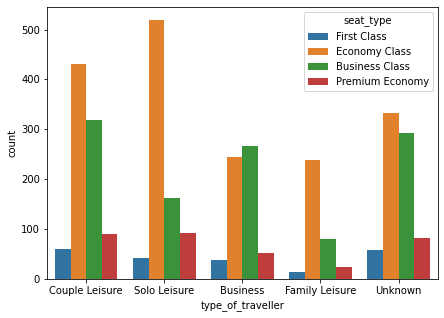

In [ ]:
a4_dims = (7,5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(ax = ax, x = 'type_of_traveller', data = df , hue= 'seat_type')

Economy is rpeferred by most types of travellers i.e. Couple and solo. 

Business class is divided into Business travellers and Couples. 

Family travellers also prefer economy and business. 

The category that we set for nan values also contains the same trend i.e. more of them are travelling through Economy and business class approximately similar trend that of Couple Leisure.   

Also the mode value for the feature suggestes to use Couples . 

Hence it would be better to change the value to "Couple Leisure". 

In [ ]:
temp['traveller'] = df.type_of_traveller.replace("Unknown", "Couple Leisure")

In [ ]:
type(temp)

pandas.core.frame.DataFrame

In [ ]:
temp  = pd.DataFrame()

In [ ]:
temp['seat_type'] = df['seat_type']

In [ ]:
temp.head()

,traveller,seat_type
0,Couple Leisure,First Class
1,Solo Leisure,Economy Class
2,Business,Business Class
3,Solo Leisure,Economy Class
4,Couple Leisure,Premium Economy


In [ ]:
temp.traveller.value_counts()

Couple Leisure    1665
Solo Leisure       817
Business           599
Family Leisure     355
Name: traveller, dtype: int64

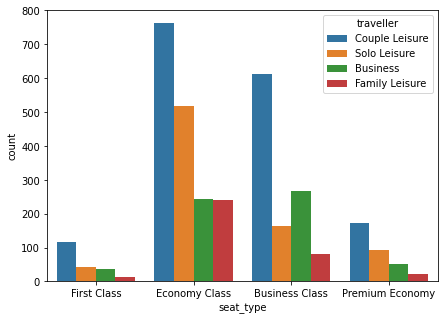

In [ ]:
a4_dims = (7,5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(ax = ax, hue = 'traveller', data =temp , x= 'seat_type')

In [ ]:
df.type_of_traveller.unique()

array(['Couple Leisure', 'Solo Leisure', 'Business', 'Family Leisure',
       'Unknown'], dtype=object)

In [ ]:
df.type_of_traveller.replace("Unknown", "Couple Leisure", inplace = True)

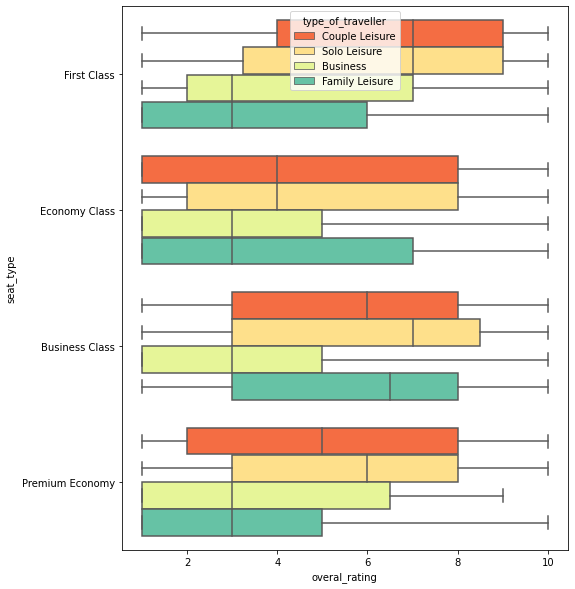

In [ ]:
a4_dims = (8,10)
# sns.color_palette("Paired")
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax = ax, x = 'overal_rating',  
            data = df ,
            y= 'seat_type', hue = 'type_of_traveller',saturation=2.5, palette='Spectral')

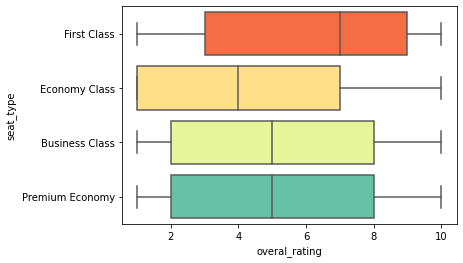

In [ ]:
sns.boxplot( x = 'overal_rating',  data = df , y= 'seat_type',saturation=2.5, palette='Spectral' )

######route

In [ ]:
df[df.aircraft.isnull()==True].shape

(1638, 12)

In [ ]:
df.route.value_counts()

London to Johannesburg           16
London to Cape Town              15
BKK to LHR                       13
LHR to MIA                       13
Vancouver to London              13
                                 ..
Miami to London                   1
London Heathrow to Dusseldorf     1
Tampa to London Gatwick           1
Florence to London Gatwick        1
BOM-LHR                           1
Name: route, Length: 1477, dtype: int64

In [ ]:
def src_dest(seq):
  words = seq.split(' to ')
  dest = words
  print(words[0]," gib " , words[1])

src_dest("Tampa to London Gatwick")

Tampa  gib  London Gatwick


In [ ]:
df.route.fillna("na to na")

0                            London to Male
1               Keflavik to London Heathrow
2              London Heathrow to Frankfurt
3       London Heathrow to Bangkok via Doha
4                  London Gatwick to Cancun
                       ...                 
3436                               na to na
3437                               na to na
3438                               na to na
3439                               na to na
3440                               na to na
Name: route, Length: 3436, dtype: object

In [ ]:
df.route.astype(str)

0                            London to Male
1               Keflavik to London Heathrow
2              London Heathrow to Frankfurt
3       London Heathrow to Bangkok via Doha
4                  London Gatwick to Cancun
                       ...                 
3436                                    nan
3437                                    nan
3438                                    nan
3439                                    nan
3440                                    nan
Name: route, Length: 3436, dtype: object

In [ ]:
df['source'] = df['route'].str.split(" to ").str[0]
df['dest'] = df['route'].str.split(" to ").str[1]

In [ ]:
df.drop(['route'], axis =1,inplace = True)

In [ ]:
df.head()

,overal_rating,content,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,aircraft,type_of_traveller,seat_type,recommended,Verification,source,dest
0,3.0,Another BA Shambles. Started off well with ex...,2,2,1,3,Boeing 777-300,Couple Leisure,First Class,yes,1,London,Male
1,1.0,BA cancelled my flight home to Heathrow on D...,2,3,1,1,A320,Solo Leisure,Economy Class,yes,0,Keflavik,London Heathrow
2,1.0,"BA cancelled my flight home, the last flight...",3,4,3,1,NaN,Business,Business Class,yes,0,London Heathrow,Frankfurt
3,2.0,"Turned up 3.5 hours in advance, Terminal 5 at ...",2,2,2,1,NaN,Solo Leisure,Economy Class,yes,1,London Heathrow,Bangkok via Doha
4,2.0,Boarding – at gate at LGW they called Group ...,4,1,1,1,NaN,Couple Leisure,Premium Economy,yes,0,London Gatwick,Cancun


In [ ]:
df.source.unique()

array(['London', 'Keflavik', 'London Heathrow', 'London Gatwick',
       'Barbados', 'Doha', 'Glasgow', 'Cairo', 'Denver', 'San Francisco',
       'Montreal', 'Miami', 'Amman Jordan', 'Dusseldorf', 'Milan',
       'Baltimore', 'Dubai', 'Dallas', 'Copenhagen', 'Larnaca', 'Atlanta',
       'Madrid', 'Orlando', 'Jersey', 'Istanbul', 'Gothenburg',
       'Heathrow', 'Sydney', 'Manchester', 'Berlin', 'Tel Aviv',
       'Los Angeles', 'Boston', 'Cape Town', 'Dallas Ft Worth', 'Accra',
       'Nairobi', 'Edinburgh', 'Vancouver', 'Sao Paulo', 'Belfast',
       'Washington', 'Dublin', 'Venice', nan, 'Edmonton', 'Amsterdam',
       'Hong Kong', 'Paris CDG', 'Portland', 'Cancun', 'Phoenix',
       'Dallas Fort-Worth', 'Islamabad', 'Johannesburg', 'Zurich',
       'Bridgetown', 'Dubrovnik', 'Columbus', 'Basel', 'Athens',
       'São Paulo', 'Pisa', 'Chicago', 'Riyadh', 'Malaga', 'Nice',
       'Santorini', 'Geneva', 'Austin', 'Gatwick', 'Singapore', 'Male',
       'New York', 'Bangalore', 'Lisbon'

In [ ]:
df.source.value_counts()[0:15]

London             455
LHR                321
London Heathrow    183
Gatwick             97
LGW                 73
Heathrow            51
London Gatwick      30
Los Angeles         26
Johannesburg        25
Singapore           23
Cape Town           22
Vancouver           21
Chicago             20
Miami               19
New York            18
Name: source, dtype: int64

In [ ]:
df.source.replace({"London": "LHR", "London Heathrow": "LHR","Heathrow": "LHR", "Gatwick": "LGW", "London Gatwick": "LGW" }, inplace = True)

In [ ]:
df.dest.replace({"London": "LHR", "London Heathrow": "LHR","Heathrow": "LHR", "Gatwick": "LGW", "London Gatwick": "LGW" }, inplace = True)

In [ ]:
df.source.value_counts()[0:10]

LHR             1010
LGW              200
Los Angeles       26
Johannesburg      25
Singapore         23
Cape Town         22
Vancouver         21
Chicago           20
Miami             19
New York          18
Name: source, dtype: int64

In [ ]:
df.dest.value_counts()[0:10]

LHR             756
LGW             138
Cape Town        25
Johannesburg     22
London           19
Dubai            17
Singapore        17
Bangkok          15
Malaga           14
New York JFK     14
Name: dest, dtype: int64

In [ ]:
df.to_csv('/content/drive/MyDrive/B_A_Data/BA_cleaned_reviews.csv')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


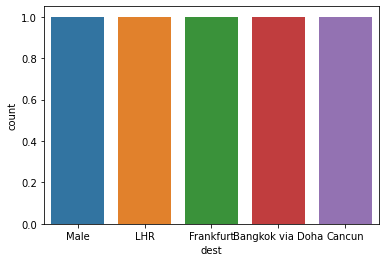

In [ ]:
sns.countplot(df.dest[0:5])

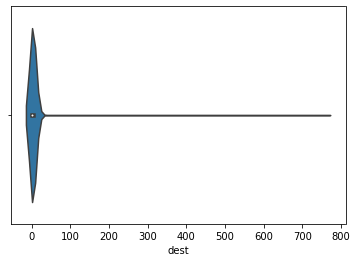

In [ ]:
sns.violinplot(df.dest.value_counts())

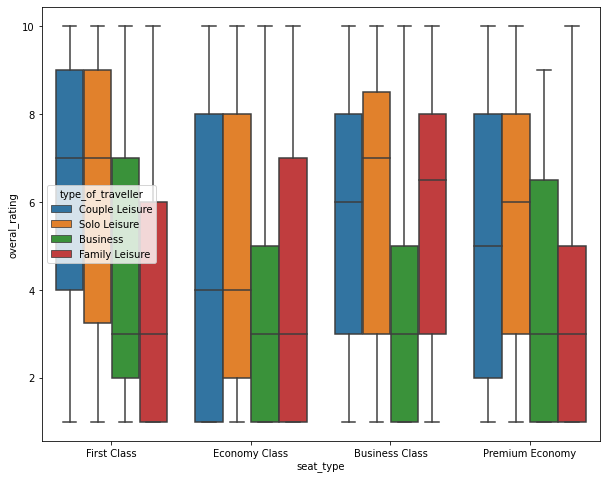

In [ ]:
a4_dims = (10,8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax = ax , y = 'overal_rating', x = 'seat_type', data = df, hue = 'type_of_traveller' )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3436 entries, 0 to 3440
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   overal_rating        3436 non-null   float64
 1   content              3436 non-null   object 
 2   seat_comfort         3436 non-null   int64  
 3   cabin_staff_service  3436 non-null   int64  
 4   food_and_beverages   3436 non-null   int64  
 5   ground_service       3436 non-null   int64  
 6   aircraft             1798 non-null   object 
 7   type_of_traveller    3436 non-null   object 
 8   seat_type            3436 non-null   object 
 9   recommended          3436 non-null   object 
 10  Verification         3436 non-null   int64  
 11  source               2667 non-null   object 
 12  dest                 2654 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 504.9+ KB


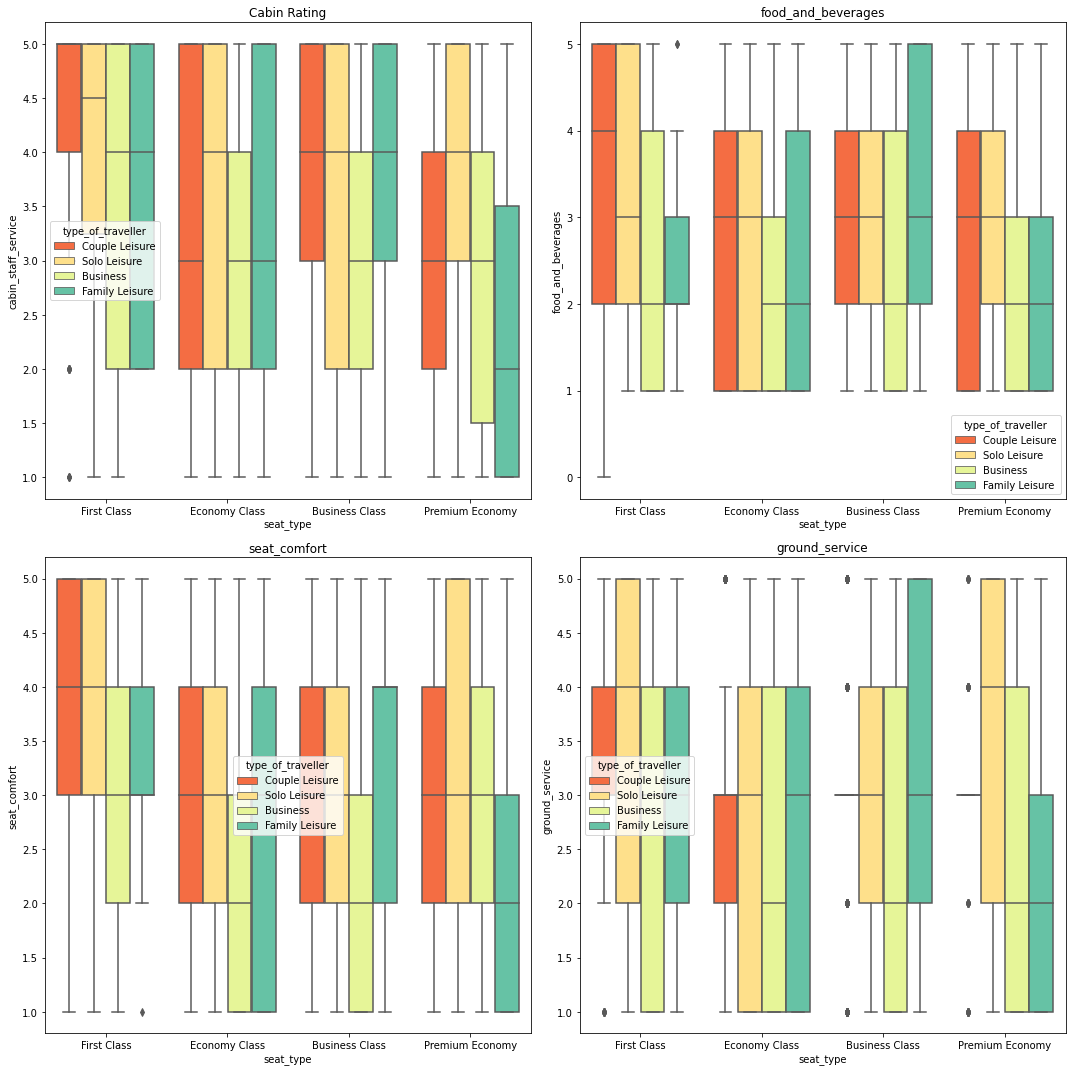

In [ ]:
fig, axes = plt.subplots(nrows = 2,ncols=  2)
fig.set_figheight(15)
fig.set_figwidth(15)

sns.boxplot( y = 'cabin_staff_service', x = 'seat_type', data = df, hue = 'type_of_traveller', ax = axes[0,0], saturation=2.5, palette='Spectral')
axes[0,0].set_title("Cabin Rating")

sns.boxplot( y = 'seat_comfort', x = 'seat_type', data = df, hue = 'type_of_traveller', ax = axes[1,0],saturation=2.5, palette='Spectral')
axes[1,0].set_title("seat_comfort")

sns.boxplot( y = 'food_and_beverages', x = 'seat_type', data = df, hue = 'type_of_traveller', ax = axes[0,1],saturation=2.5, palette='Spectral')
axes[0,1].set_title("food_and_beverages")

sns.boxplot( y = 'ground_service', x = 'seat_type', data = df, hue = 'type_of_traveller' ,ax = axes[1,1],saturation=2.5, palette='Spectral')
axes[1,1].set_title("ground_service")

fig.tight_layout()

In [80]:
df['recommended'] = df.recommended.map({'yes':1, 'no':0 })

In [111]:
df.recommended.value_counts()/len(df.recommended) *100

1    98.253783
0     1.746217
Name: recommended, dtype: float64

In [109]:
df.recommended.groupby(df['seat_type']).value_counts()

seat_type        recommended
Business Class   1              1110
                 0                12
Economy Class    1              1727
                 0                39
First Class      1               206
                 0                 3
Premium Economy  1               333
                 0                 6
Name: recommended, dtype: int64

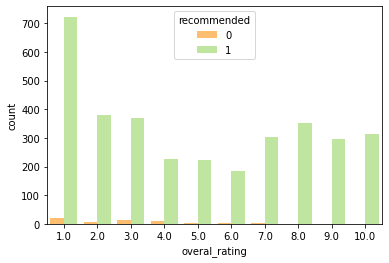

In [91]:
sns.countplot( x= 'overal_rating', hue =  'recommended',  data = df, saturation=2.5, palette='Spectral')

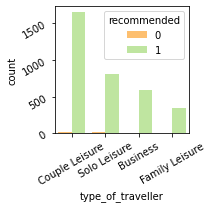

In [99]:
fig, axes = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(3)

sns.countplot( x= 'type_of_traveller', hue =  'recommended',  data = df,ax = axes, saturation=2.5, palette='Spectral')
axes.tick_params(rotation=30)
fig.tight_layout()

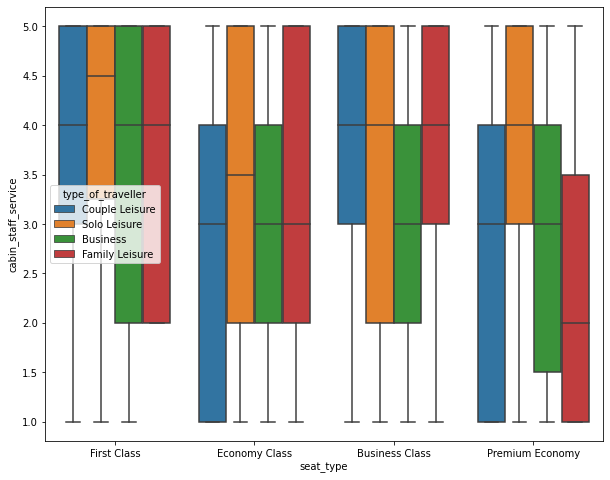

In [ ]:
plt.figure(figsize=(12, 7))
for i, company   in enumerate(stocks, 1):
  plt.subplot(2,2,i)
  company['Daily Return'].hist(bins= 100)
  plt.title(company_name[i-1])
  plt.ylabel('Daily Return')

plt.tight_layout()

a4_dims = (10,8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax = ax , y = 'cabin_staff_service', x = 'seat_type', data = df, hue = 'type_of_traveller' )

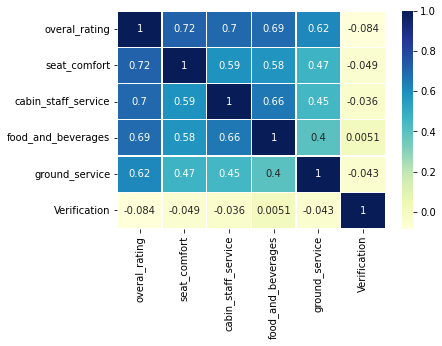

In [ ]:
# sns.heatmap(df.corr(), color='Spectral')
sns.heatmap(df.corr(),annot = True,cmap='YlGnBu',linewidths=0.30)


###### aircraft

In [ ]:
df.groupby(['aircraft','overal_rating']).size().sort_index(ascending= False)

aircraft    overal_rating
boeing 787  6.0              1
Various     1.0              1
Saab 2000   10.0             1
SAAB 2000   10.0             1
Embraer170  9.0              1
                            ..
777-300     9.0              1
777-200     1.0              1
777         9.0              1
            1.0              2
767-300     6.0              1
Length: 399, dtype: int64

In [ ]:
# df1 = df.reset_index()
unique_aircrafts = set()
for i in range(0,len(df1)):
  craft = str(df1['aircraft'][i]).lower()
  crafts = craft.split(' / ')
  for craft in crafts:
    unique_aircrafts.add(craft)
    # unique_aircrafts.add(" ".join(craft.strip().split()) ) 


In [ ]:
unique_aircrafts

In [ ]:
len(unique_aircrafts)

139

#### content NLP

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/B_A_Data/BA_cleaned_reviews.csv', index_col=False)

In [4]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,overal_rating,content,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,aircraft,type_of_traveller,seat_type,recommended,Verification,source,dest,corpus
0,0,0,3.0,Another BA Shambles. Started off well with ex...,2,2,1,3,Boeing 777-300,Couple Leisure,First Class,yes,1,LHR,Male,another ba shamble started well excellent chec...
1,1,1,1.0,BA cancelled my flight home to Heathrow on D...,2,3,1,1,A320,Solo Leisure,Economy Class,yes,0,Keflavik,LHR,ba cancelled flight home heathrow dec th face ...
2,2,2,1.0,"BA cancelled my flight home, the last flight...",3,4,3,1,NaN,Business,Business Class,yes,0,LHR,Frankfurt,ba cancelled flight home last flight day heath...
3,3,3,2.0,"Turned up 3.5 hours in advance, Terminal 5 at ...",2,2,2,1,NaN,Solo Leisure,Economy Class,yes,1,LHR,Bangkok via Doha,turned hour advance terminal london heathrow a...
4,4,4,2.0,Boarding – at gate at LGW they called Group ...,4,1,1,1,NaN,Couple Leisure,Premium Economy,yes,0,LGW,Cancun,boarding gate lgw called group board world tra...


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()
stp_words = set(stopwords.words('english'))

In [ ]:
corpus = []
for i in range(len(df)):
  title = re.sub('[^a-zA-Z]', " ", df['content'][i])
  title = title.lower()
  title = title.split()  # sent to words
  title = [lemmatizer.lemmatize(word) for word in title if word not in stp_words]
  title = ' '.join(title)
  corpus.append(title)

In [ ]:
corpus[0]

'another ba shamble started well excellent check first mid afternoon avoided early morning evening scrum concorde lounge excellent service great choice cocktail wine etc food ok bit overcooked pretty reasonable called boarding gate chaos people jostling position get plane people child called people first bankrolling flight well get told none light first dimmed light night like detained interrogated excellent wine champagne selection dinner menu handed prawn cocktail start please loaded one people guy got bet felt like lottery ok beef wellington basically freezing slice beef lettuce main curry substituted christmas dinner going maldives get away christmas ended short rib inedible salad starter water offered bread roll eat basically husband spent return seat blinded light left starving apology watch ba virgin start flying direct october always rest laurel treat customer like idiot'

In [ ]:
df['corpus'] = corpus

In [ ]:
df.head()

,Unnamed: 0,overal_rating,content,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,aircraft,type_of_traveller,seat_type,recommended,Verification,source,dest,corpus
0,0,3.0,Another BA Shambles. Started off well with ex...,2,2,1,3,Boeing 777-300,Couple Leisure,First Class,yes,1,LHR,Male,another ba shamble started well excellent chec...
1,1,1.0,BA cancelled my flight home to Heathrow on D...,2,3,1,1,A320,Solo Leisure,Economy Class,yes,0,Keflavik,LHR,ba cancelled flight home heathrow dec th face ...
2,2,1.0,"BA cancelled my flight home, the last flight...",3,4,3,1,NaN,Business,Business Class,yes,0,LHR,Frankfurt,ba cancelled flight home last flight day heath...
3,3,2.0,"Turned up 3.5 hours in advance, Terminal 5 at ...",2,2,2,1,NaN,Solo Leisure,Economy Class,yes,1,LHR,Bangkok via Doha,turned hour advance terminal london heathrow a...
4,4,2.0,Boarding – at gate at LGW they called Group ...,4,1,1,1,NaN,Couple Leisure,Premium Economy,yes,0,LGW,Cancun,boarding gate lgw called group board world tra...


In [ ]:
df.to_csv('/content/drive/MyDrive/B_A_Data/BA_cleaned_reviews.csv')

In [ ]:
all_text = ''.join(corpus)

In [ ]:
from collections import Counter
def count_words_fast(text):     
    word_counts = Counter(text.split(" ")) 
    return word_counts 

In [ ]:
word_counts = count_words_fast(all_text)
def word_stats(word_counts):      
    num_unique = len(word_counts) 
    counts = word_counts.values() 
    return (num_unique, counts) 

word_stats(word_counts)

In [ ]:
word_counts.most_common()[:20]

[('flight', 7018),
 ('ba', 4386),
 ('seat', 4237),
 ('service', 2682),
 ('food', 2250),
 ('time', 2220),
 ('crew', 2069),
 ('cabin', 1959),
 ('good', 1948),
 ('airway', 1934),
 ('british', 1926),
 ('london', 1819),
 ('class', 1777),
 ('hour', 1673),
 ('one', 1543),
 ('airline', 1530),
 ('business', 1455),
 ('staff', 1445),
 ('heathrow', 1411),
 ('would', 1386)]

In [ ]:
from wordcloud import WordCloud

In [ ]:
len(stp_words)

179

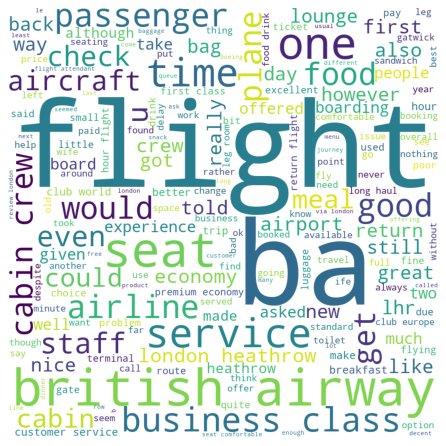

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stp_words,
                min_font_size = 10).generate(all_text)
 
# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Here we can observe that some of the words appearing in the word cloud are not as important as they seem. 

They are:- 
ba, british airway, airline, passenger, flight, hence will add them in the stopwords 

In [ ]:
stp_words.add('ba')
stp_words.add('british airway')
stp_words.add('airway')
stp_words.add('british')
stp_words.add('airline')
stp_words.add('passenger')
stp_words.add('flight')
stp_words.add('one')

In [ ]:
len(stp_words)

187

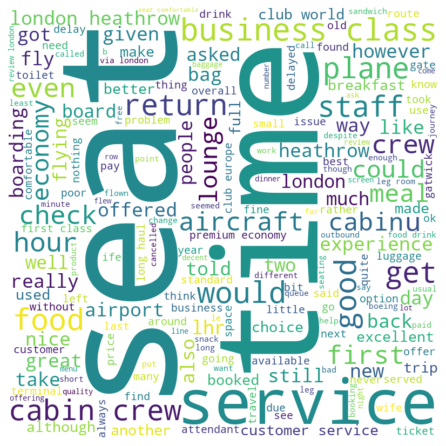

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stp_words,
                min_font_size = 10).generate(all_text)
 
# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = all_text.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20) 

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

In [ ]:
all_fdist

seat        4237
service     2682
food        2250
time        2220
crew        2069
cabin       1959
good        1948
class       1777
hour        1673
business    1455
staff       1445
economy     1324
check       1179
drink       1153
meal        1111
lounge      1059
return      1050
club        1034
boarding     932
bag          844
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

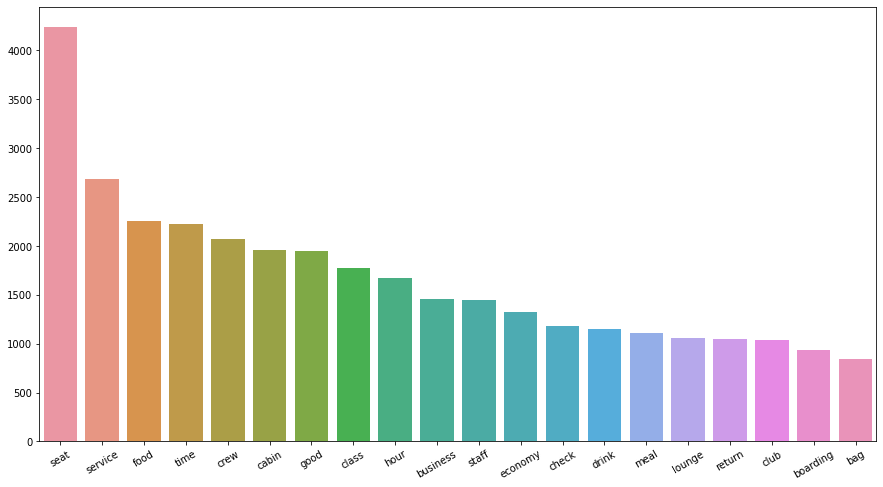

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,8))
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30)

In [ ]:
def nGrams(count):
  bigram = ngrams(new_words, count)
  frq_bigram = FreqDist(bigram).most_common(30)
  bigram_words = {'_'.join(k):v for k,v in sorted(frq_bigram, key=lambda item:item[1]) }
  return bigram_words

In [ ]:
three_gram_words = nGrams(3)

In [ ]:
three_gram_words

{'seat_middle_seat': 18,
 'haul_business_class': 18,
 'seat_leg_room': 18,
 'good_cabin_crew': 19,
 'food_drink_service': 19,
 'gold_card_holder': 19,
 'cabin_crew_good': 20,
 'business_class_product': 20,
 'premium_economy_cabin': 20,
 'cabin_crew_professional': 20,
 'time_cabin_crew': 21,
 'business_class_experience': 21,
 'cabin_crew_excellent': 21,
 'cabin_crew_member': 21,
 'seat_business_class': 21,
 'business_class_ticket': 25,
 'club_europe_seat': 25,
 'business_class_lounge': 26,
 'service_cabin_crew': 27,
 'business_class_cabin': 30,
 'club_world_cabin': 32,
 'extra_leg_room': 33,
 'fast_track_security': 34,
 'premium_economy_seat': 36,
 'club_world_seat': 38,
 'low_cost_carrier': 41,
 'cabin_crew_friendly': 41,
 'new_york_jfk': 41,
 'world_traveller_plus': 75,
 'business_class_seat': 96}

In [ ]:
frq_bigram = pd.Series(three_gram_words)

In [ ]:
frq_bigram

seat_middle_seat             18
haul_business_class          18
seat_leg_room                18
good_cabin_crew              19
food_drink_service           19
gold_card_holder             19
cabin_crew_good              20
business_class_product       20
premium_economy_cabin        20
cabin_crew_professional      20
time_cabin_crew              21
business_class_experience    21
cabin_crew_excellent         21
cabin_crew_member            21
seat_business_class          21
business_class_ticket        25
club_europe_seat             25
business_class_lounge        26
service_cabin_crew           27
business_class_cabin         30
club_world_cabin             32
extra_leg_room               33
fast_track_security          34
premium_economy_seat         36
club_world_seat              38
low_cost_carrier             41
cabin_crew_friendly          41
new_york_jfk                 41
world_traveller_plus         75
business_class_seat          96
dtype: int64

In [ ]:
four_grams= pd.Series(nGrams(4))
four_grams

selection_movie_tv_music             4
economy_seat_middle_seat             4
customer_service_non_existent        4
cabin_crew_friendly_professional     4
avios_amex_companion_voucher         5
world_traveller_plus_cabin           5
club_world_upper_deck                5
seat_extra_leg_room                  5
long_haul_short_haul                 5
cabin_crew_friendly_helpful          5
time_landed_slightly_early           5
club_world_business_class            5
leg_room_club_europe                 5
featured_new_slim_seat               5
seat_middle_seat_blocked             6
world_traveller_plus_seat            6
left_time_arrived_early              6
booked_world_traveller_plus          6
cabin_crew_efficient_friendly        6
return_check_quick_security          6
new_club_europe_seat                 6
cabin_crew_friendly_attentive        7
business_class_seat_economy          7
club_europe_business_class           7
short_haul_business_class            8
extra_leg_room_seat      

In [ ]:
fig, axes = plt.subplots(nrows = 2,ncols=  2)
fig.set_figheight(15)
fig.set_figwidth(15)

sns.boxplot( y = 'cabin_staff_service', x = 'seat_type', data = df, hue = 'type_of_traveller', ax = axes[0,0], saturation=2.5, palette='Spectral')
axes[0,0].set_title("Cabin Rating")

sns.boxplot( y = 'seat_comfort', x = 'seat_type', data = df, hue = 'type_of_traveller', ax = axes[1,0],saturation=2.5, palette='Spectral')
axes[1,0].set_title("seat_comfort")

sns.boxplot( y = 'food_and_beverages', x = 'seat_type', data = df, hue = 'type_of_traveller', ax = axes[0,1],saturation=2.5, palette='Spectral')
axes[0,1].set_title("food_and_beverages")

sns.boxplot( y = 'ground_service', x = 'seat_type', data = df, hue = 'type_of_traveller' ,ax = axes[1,1],saturation=2.5, palette='Spectral')
axes[1,1].set_title("ground_service")

fig.tight_layout()

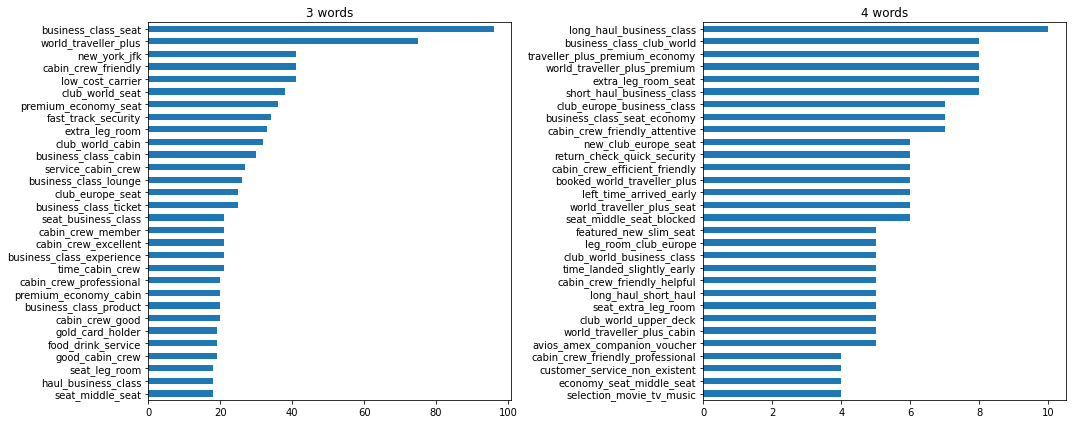

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols= 2)
fig.set_figheight(6)
fig.set_figwidth(15)

frq_bigram.plot(kind = 'barh', ax= ax[0])
ax[0].set_title("3 words")

four_grams.plot(kind = 'barh' ,ax = ax[1])
ax[1].set_title("4 words")

fig.tight_layout()

######Sentiments

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [115]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

TextBlob(df.corpus[0]).sentiment[0]

0.30303030303030315

In [116]:
df['polarity'] = 0
polarity = []
for i in range(len(df.corpus)):
  sent = TextBlob(df.corpus[i])
  polarity.append( sent.sentiment.polarity)

df.polarity = polarity

In [8]:
len(df.polarity)

3436

In [9]:
df.polarity.describe()

count    3436.000000
mean        0.104589
std         0.184651
min        -0.766667
25%        -0.013889
50%         0.100000
75%         0.218824
max         0.800000
Name: polarity, dtype: float64

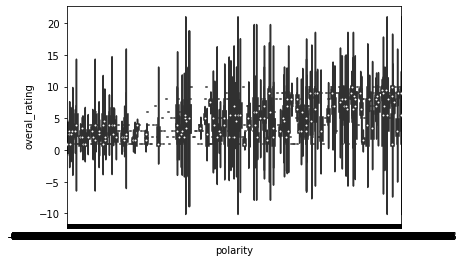

In [10]:
import seaborn as sns
sns.violinplot(x = 'polarity', y='overal_rating', data = df, palette = 'Spectral')

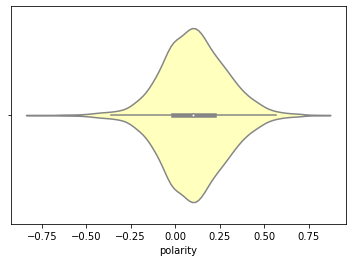

In [16]:
sns.violinplot(x = 'polarity', data = df, palette = 'Spectral', saturation = 1.5 )

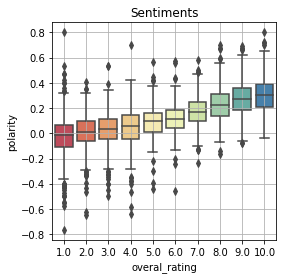

In [122]:
fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(4)
sns.boxplot(ax = ax, x = 'overal_rating', y = 'polarity',data = df,  palette = 'Spectral')
ax.set_title('Sentiments')
ax.grid()

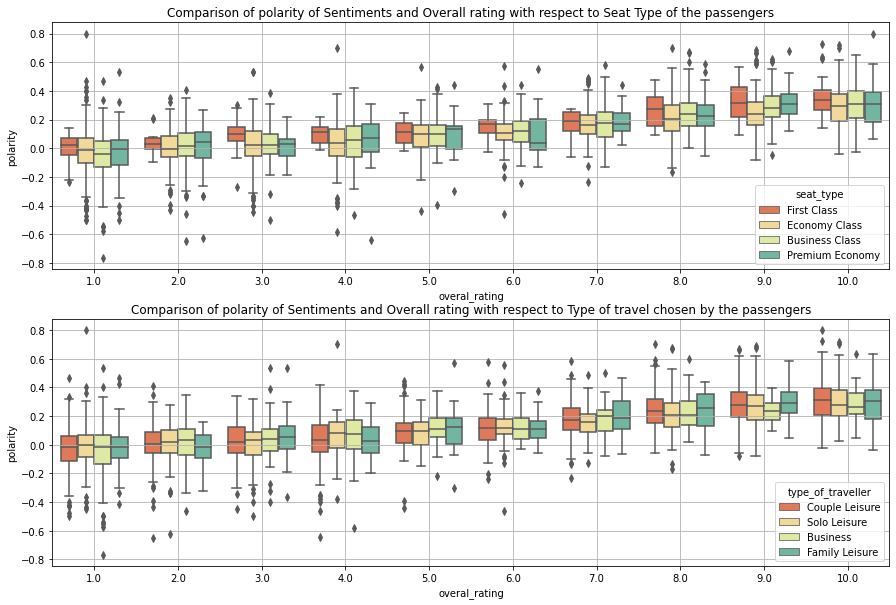

In [40]:
fig, ax = plt.subplots(nrows = 2, ncols= 1)
fig.set_figheight(10)
fig.set_figwidth(15)
sns.boxplot(ax = ax[0], x = 'overal_rating', y = 'polarity',data = df,  palette = 'Spectral', hue = 'seat_type')
ax[0].set_title('Comparison of polarity of Sentiments and Overall rating with respect to Seat Type of the passengers')
ax[0].grid()
sns.boxplot(ax = ax[1], x = 'overal_rating', y = 'polarity',data = df,  palette = 'Spectral', hue = 'type_of_traveller')
ax[1].set_title('Comparison of polarity of Sentiments and Overall rating with respect to Type of travel chosen by the passengers')
ax[1].grid()


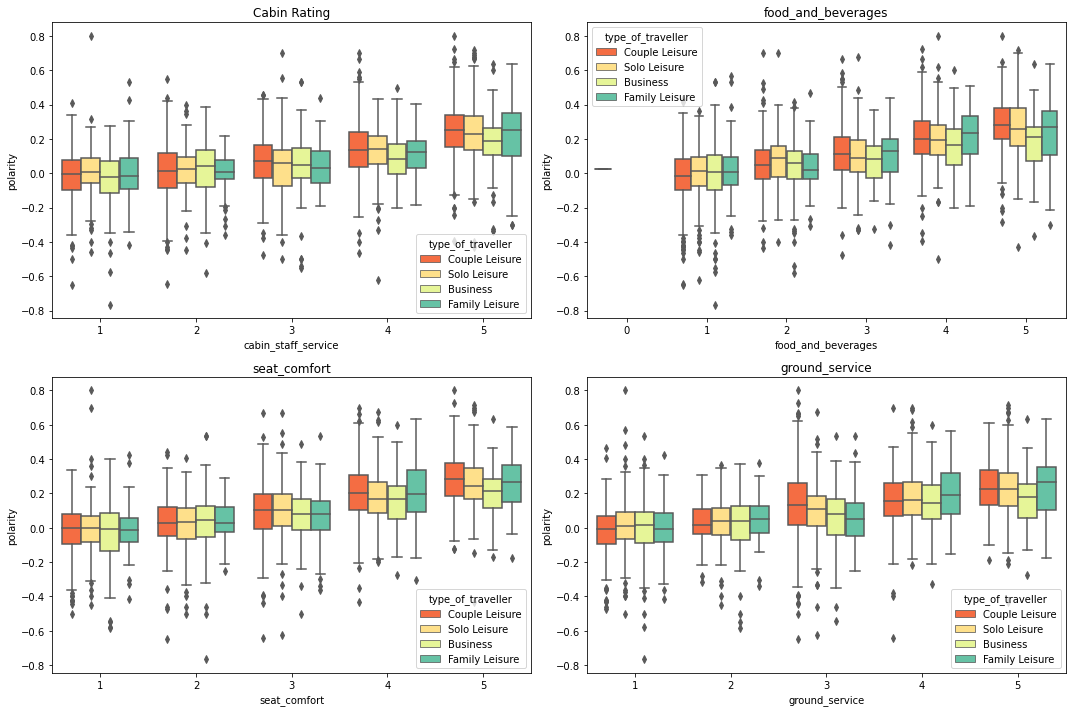

In [46]:
fig, axes = plt.subplots(nrows = 2,ncols=  2)
fig.set_figheight(10)
fig.set_figwidth(15)

sns.boxplot( x = 'cabin_staff_service', y = 'polarity', data = df, hue = 'type_of_traveller', ax = axes[0,0], saturation=2.5, palette='Spectral')
axes[0,0].set_title("Cabin Rating")

sns.boxplot( x = 'seat_comfort', y = 'polarity', data = df, hue = 'type_of_traveller', ax = axes[1,0],saturation=2.5, palette='Spectral')
axes[1,0].set_title("seat_comfort")

sns.boxplot( x = 'food_and_beverages', y = 'polarity', data = df, hue = 'type_of_traveller', ax = axes[0,1],saturation=2.5, palette='Spectral')
axes[0,1].set_title("food_and_beverages")

sns.boxplot( x = 'ground_service', y = 'polarity', data = df, hue = 'type_of_traveller' ,ax = axes[1,1],saturation=2.5, palette='Spectral')
axes[1,1].set_title("ground_service")

fig.tight_layout()

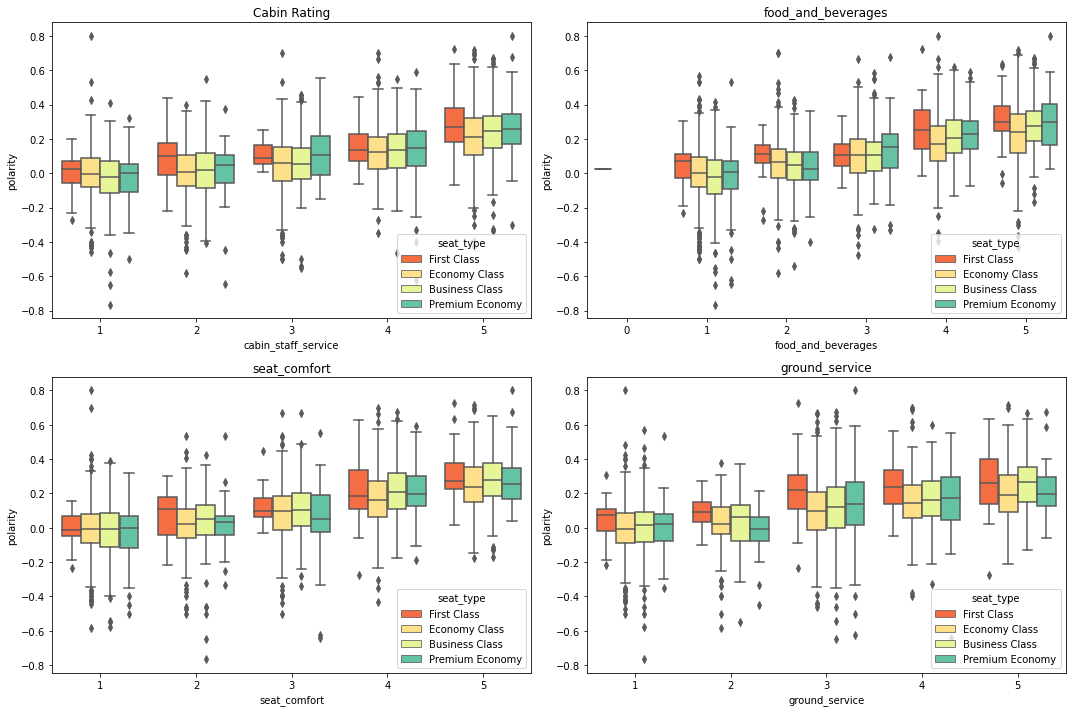

In [45]:
fig, axes = plt.subplots(nrows = 2,ncols=  2)
fig.set_figheight(10)
fig.set_figwidth(15)

sns.boxplot( x = 'cabin_staff_service', y = 'polarity', data = df, hue = 'seat_type', ax = axes[0,0], saturation=2.5, palette='Spectral')
axes[0,0].set_title("Cabin Rating")

sns.boxplot( x = 'seat_comfort', y = 'polarity', data = df, hue = 'seat_type', ax = axes[1,0],saturation=2.5, palette='Spectral')
axes[1,0].set_title("seat_comfort")

sns.boxplot( x = 'food_and_beverages', y = 'polarity', data = df, hue = 'seat_type', ax = axes[0,1],saturation=2.5, palette='Spectral')
axes[0,1].set_title("food_and_beverages")

sns.boxplot( x = 'ground_service', y = 'polarity', data = df, hue = 'seat_type' ,ax = axes[1,1],saturation=2.5, palette='Spectral')
axes[1,1].set_title("ground_service")

fig.tight_layout()

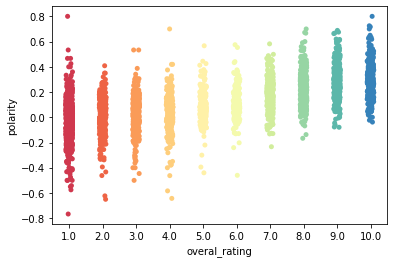

In [29]:
sns.stripplot(x = 'overal_rating', y = 'polarity',data = df,  palette = 'Spectral')

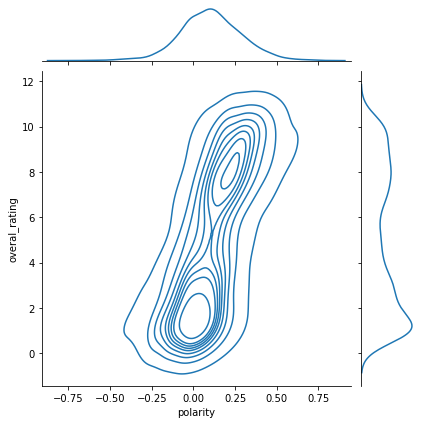

In [ ]:
sns.jointplot(data = df, x = 'polarity', y = 'overal_rating', kind = 'kde')

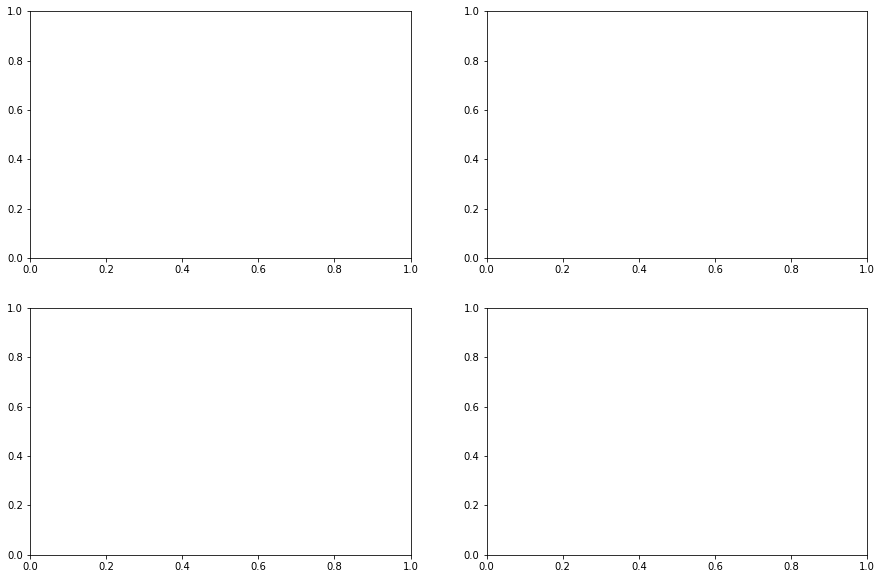

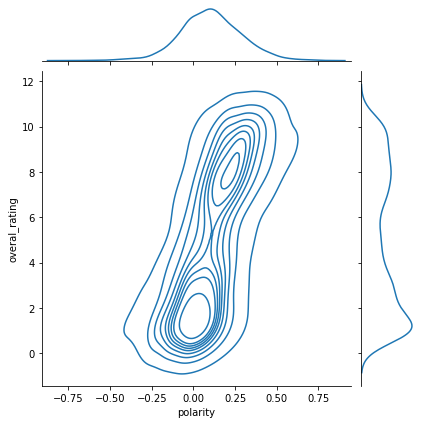

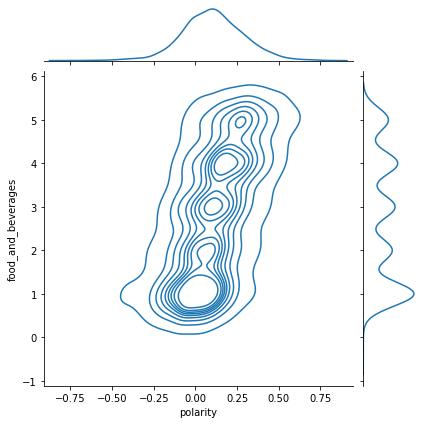

In [55]:
fig, axes = plt.subplots(nrows = 2,ncols=  2)
fig.set_figheight(10)
fig.set_figwidth(15)

sns.jointplot( ax = axes[0,0], data = df, x = 'polarity', y = 'overal_rating', kind = 'kde')
sns.jointplot( ax = axes[0,1], data = df, x = 'polarity', y = 'food_and_beverages', kind = 'kde')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


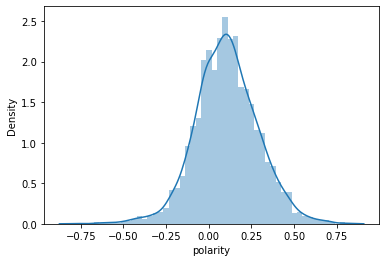

In [56]:
sns.distplot(df.polarity)

In [ ]:
sns.jointplot(data = df, x = 'polarity', y = 'overal_rating', kind = 'resi')

In [7]:
df = pd.read_csv('/content/drive/MyDrive/B_A_Data/BA_cleaned_reviews.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3436 entries, 0 to 3435
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3436 non-null   int64  
 1   Unnamed: 0.1         3436 non-null   int64  
 2   overal_rating        3436 non-null   float64
 3   content              3436 non-null   object 
 4   seat_comfort         3436 non-null   int64  
 5   cabin_staff_service  3436 non-null   int64  
 6   food_and_beverages   3436 non-null   int64  
 7   ground_service       3436 non-null   int64  
 8   aircraft             1798 non-null   object 
 9   type_of_traveller    3436 non-null   object 
 10  seat_type            3436 non-null   object 
 11  recommended          3436 non-null   object 
 12  Verification         3436 non-null   int64  
 13  source               2667 non-null   object 
 14  dest                 2654 non-null   object 
 15  corpus               3436 non-null   o

In [11]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,overal_rating,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,Verification
count,3436.00000,3436.000000,3436.000000,3436.000000,3436.000000,3436.000000,3436.000000,3436.000000
mean,1717.50000,1718.021246,4.845460,2.902794,3.278522,2.732247,2.876019,0.278522
std,992.03209,992.823544,3.157899,1.359160,1.483971,1.440894,1.277869,0.448337
min,0.00000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,858.75000,858.750000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1717.50000,1717.500000,4.000000,3.000000,4.000000,3.000000,3.000000,0.000000
75%,2576.25000,2576.250000,8.000000,4.000000,5.000000,4.000000,4.000000,1.000000
max,3435.00000,3440.000000,10.000000,5.000000,5.000000,5.000000,5.000000,1.000000
